<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных." data-toc-modified-id="Загрузка-и-подготовка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных.</a></span></li><li><span><a href="#Сравнение-качества-линейной-регрессии." data-toc-modified-id="Сравнение-качества-линейной-регрессии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Сравнение качества линейной регрессии.</a></span><ul class="toc-item"><li><span><a href="#Обоснование-решения." data-toc-modified-id="Обоснование-решения.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обоснование решения.</a></span></li></ul></li><li><span><a href="#Разработка-алгоритма-преобразования-данных." data-toc-modified-id="Разработка-алгоритма-преобразования-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разработка алгоритма преобразования данных.</a></span></li><li><span><a href="#Проверка-качества-линейной-регрессии" data-toc-modified-id="Проверка-качества-линейной-регрессии-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка качества линейной регрессии</a></span></li><li><span><a href="#Общий-вывод-по-исследованию:" data-toc-modified-id="Общий-вывод-по-исследованию:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод по исследованию:</a></span></li></ul></div>

<div class="alert alert-info"><b>Описание проекта:</b>
   
# "Защита данных клиентов страховой компании «Хоть потоп»"

***

**Цели проекта:**
- защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.
    
***
    
**Задачи исследования:**  
- умножить признаки на обратимую матрицу и проверить, изменится ли качество линейной регрессии;
- обосновать, почему при разработке алгоритма преобразования данных качество линейной регрессии не поменяется;   
- проверить через метрику R2, что качество линейной регрессии из sklearn не отличается до и после преобразования данных. 
    
***
    
**Этапы исследования:** 
- загрузка и подготовка данных;
- сравнение качества линейной регрессии на исходных данных и на преобразованных;
- разработка алгоритма преобразования данных для решения задачи, программирование алгоритма с использованием матричных операций;
- общий вывод по исследованию.
    
***
  
</div>

***

### Загрузка и подготовка данных.

In [1]:
import warnings
import os

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

# Константы
RANDOM_STATE = 12345

In [2]:
pth1 = 'C:/Датасеты и проекты/insurance.csv'
pth2 = '/datasets/insurance.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [3]:
# Выводим первые 5 строк датасета с данными.
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
# Получение информации о датасете.
data_all = [data]
data_names = ['Данные о клиентах']

for i in range(len(data_all)):
        print(f'Количество строк и столбцов в датасете "{data_names[i]}": {data_all[i].shape}')
        print('-' * 30)
        print(f'Пропуски в датасете "{data_names[i]}":\n{data_all[i].isna().sum()}')
        print('-' * 30)
        print(f'Информация о типах данных в датасете "{data_names[i]}":\n{data_all[i].dtypes}')
        print('-' * 30)
        print(f'Распределение численных значений признаков в датасете:\n{data_all[i].describe()}')
        print('<-->' * 15,'\n')        

Количество строк и столбцов в датасете "Данные о клиентах": (5000, 5)
------------------------------
Пропуски в датасете "Данные о клиентах":
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64
------------------------------
Информация о типах данных в датасете "Данные о клиентах":
Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object
------------------------------
Распределение численных значений признаков в датасете:
               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%   

In [5]:
# Исследуем уникальные значения столбцов 'Возраст' и 'Зарплата'.

print(data['Возраст'].unique())
print()
print(data['Зарплата'].unique())

[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]

[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 38500. 51800.
 33800. 46400. 43200. 31800. 50200. 35100. 30700. 45800. 49300. 42800.
 33600. 50300. 34000. 36400. 4

In [6]:
# Поскольку значения в данных столбцах не содержат знаков после запятой, то приведем их к типу int64.
data = data.astype({'Возраст':'int64','Зарплата':'int64'},errors='ignore')

 <div class="alert alert-info"><b>Комментарий:</b>
   
По результатам получения информации о датасетах:
* Представлены данные по 5000 клиентов
* Пропусков в данных нет
* Типы данных в столбцах оптимизированы по их содержимому
* Явных аномалий в численных значениях не прослеживается
    
</div>

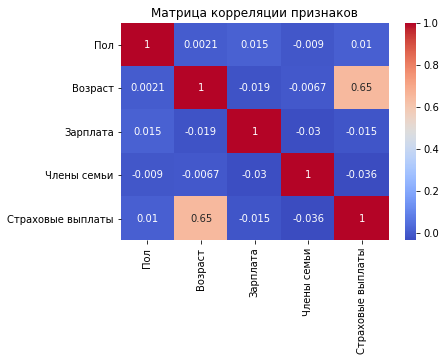

In [7]:
# Построим матрицу корреляции признаков.
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');
plt.title(f'Матрица корреляции признаков');

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Прослеживается зависимость между страховыми выплатами и возрастом клиентов.
    
</div>

In [8]:
# Поскольку мы работаем с данными страховой компании, то в качестве целевого признака выбираем 'Страховые выплаты'.
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [9]:
# Разделим данные на обучающую и тестовую выборки.
train_features, test_features, train_target, test_target = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=RANDOM_STATE)

In [10]:
# Проверим распределение данных в обучающей и тестовой выборках.
print(f'Распределение данных в обучающей выборке: {train_features.shape}, {train_target.shape}')
print(f'Распределение данных в тестовой выборке: {test_features.shape}, {test_target.shape}')

Распределение данных в обучающей выборке: (3750, 4), (3750,)
Распределение данных в тестовой выборке: (1250, 4), (1250,)


<div class="alert alert-info"><b>Промежуточные выводы:</b>

На данном этапе выполнены следующие действия:
- исследованы типы данных в признаках, типы данных оптимизированы по их содержимому.
- изучена информация о датасете, пропусков в данных не обнаружено, явных аномалий в численных значениях не прослеживается.
- при построении матрицы корреляции признаков установлена зависимость между страховыми выплатами и возрастом клиентов, что в принципе ожидаемо. 
- определен целевой признак, данные разделены на обучающую и тестовую выборки.

</div>

***

### Сравнение качества линейной регрессии.

In [11]:
# Создадим модель линейной регрессии для предсказания.

class LinearRegression_basic:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # < напишите код здесь >
        self.w = w[1:]
        self.w0 = w[0]
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
pipeline = make_pipeline(StandardScaler(), LinearRegression_basic())

In [12]:
# На основе исходных данных проверим качество модели, используя метрику MSE, и адекватность модели, используя метрику R2.
pipeline.fit(train_features, train_target)
predictions = pipeline.predict(test_features)
print(f'Значение метрики R2 на основе исходных данных: {r2_score(test_target, predictions)}')
print(f'Значение метрики MSE на основе исходных данных: {mean_squared_error(test_target, predictions)}')

Значение метрики R2 на основе исходных данных: 0.43522756840833365
Значение метрики MSE на основе исходных данных: 0.1166051753161418


 <div class="alert alert-info"><b>Комментарий:</b>
   
По правилам матричного умножения ширина первой матрицы должна быть равна высоте второй. Обратимая матрица является квадратной.     
Следовательно необходимо построить случайную квадратную матрицу размером, равным ширине  матрицы 'train_features'.
    
</div>

In [13]:
# Напишем функцию для построения случайной квадратной обратимой матрицы.
def func(dim):
    transform_matrix = np.random.randn(dim, dim)
    try: 
        inv = np.linalg.inv(transform_matrix)
        return transform_matrix      
    except:
        func(dim)

In [14]:
# Построение случайной квадратной матрицы, равной ширине матрицы 'train_features' .
P = func(train_features.shape[1])
P

array([[ 0.617158  , -1.13605902, -0.42441627, -0.715251  ],
       [ 0.06167403,  0.4506843 ,  0.40939858, -0.33816742],
       [-1.32145426,  1.58793142,  0.43227186,  0.38581298],
       [-0.27831228,  0.49246084, -0.43679747,  0.03814949]])

In [15]:
# Умножим признаки обучающей и тестовой выборок на обратимую матрицу.
train_P = train_features.dot(P)
test_P = test_features.dot(P)

In [16]:
# Выведем первые пять строк измененных признаков обучающей выборки.
print(train_P.head())

                 0             1             2             3
3369 -47833.653440  57501.853295  15664.984203  13951.211748
1441 -76113.051391  91479.037102  24912.354185  22210.614979
571  -54310.074894  65278.895794  17779.037342  15846.130465
225  -59595.645244  71632.424218  19509.762370  17388.029735
2558 -66864.107017  80365.187446  21885.592599  19511.053803


 <div class="alert alert-info"><b>Наблюдения:</b>
   
Данные приняли неидентифицируемый вид и значения.
    
</div>

In [17]:
# На основе измененных данных проверим качество модели, используя метрику MSE, и адекватность модели, используя метрику R2.
pipeline.fit(train_P, train_target)
predictions = pipeline.predict(test_P)

print(f'Значение метрики R2 на основе измененных данных: {r2_score(test_target, predictions)}')
print(f'Значение метрики MSE на основе измененных данных: {mean_squared_error(test_target, predictions)}')

Значение метрики R2 на основе измененных данных: 0.4352275676720465
Значение метрики MSE на основе измененных данных: 0.11660517546815859


 <div class="alert alert-info"><b>Комментарий:</b>
    
Значение метрики R2 на основе исходных данных: 0.43522756840833365    
Значение метрики MSE на основе исходных данных: 0.1166051753161418
    
Значение метрики R2 на основе измененных данных: 0.4352275685147502    
Значение метрики MSE на основе измененных данных: 0.11660517529417061    

Расхождение метрик у моделей, построенных на основе исходных и измененных данных, начинается с 10 знака после запятой, на основании чего можно сделать вывод, что качество линейной регрессии после преобразования данных не изменилось.
    
</div>

#### Обоснование решения.

Свойства матриц:
$$(AB)^T = A^TB^T$$
$$(AB)^{-1} = A^{-1}B^{-1}$$
$$AE = EA = A$$
$$(ABC)^{-1} = C^{-1}(AB)^{-1} = (BC)^{-1}A^{-1} = C^{-1}B^{-1}A^{-1}$$

Произведение квадратной матрицы и обратной для нее матрицы равно единичной матрице.
$$AA^{-1} = A^{-1}A = E$$

Применим свойства в нашем исследовании.

Минимальное значение MSE линейной регрессии на основе исходных данных получается, когда веса равны этой величине: 
$$w = (X^TX)^{-1} X^Ty$$

Учитывая, что признаки в исходных данных мы умножили на случайную обратимую матрицу P (обозначим получившуюся матрицу <b>Z = XP</b>), то минимальное значение MSE линейной регрессии на основе измененных данных получается, когда веса равны этой величине: 
$$w_p = (Z^TZ)^{-1} Z^Ty$$

Заменим в данной формуле <b>Z</b> на <b>XP</b>:
$$w_p = ((XP)^TXP)^{-1} (XP)^Ty$$

Основываясь на свойствах матриц, раскроем скобки:
$$w_p = ((XP)^TXP)^{-1} (XP)^Ty = (X^TP^TXP)^{-1}X^T(P)^Ty$$

Для удобства проставим скобки и, опираясь на свойства произведения квадратной матрицы и обратной для нее матрицы (их произведение равно единичной матрице (<b>E</b>)), а также, что произведение матрицы на единичную равно самой матрице , сократим $(P^T)^{-1}$ и $P^T$:

$$
w_p = (P^T (X^T X) P)^{-1} (P)^T X^T y =  (P^T)^{-1}(X^T X)^{-1} (P)^{-1} (P)^T X^T y =  P^{-1}(X^TX)^{-1}EX^Ty = P^{-1}(X^TX)^{-1}X^Ty
$$  

В свою очередь $(X^TX)^{-1} X^Ty = w$.

Следовательно: 
$$
w_p = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w
$$  

Узнаем значение вектора предсказаний ($\alpha$) на основе исходных данных:
$$\alpha = Xw$$ 

Сравним значения вектора предсказаний ($\alpha_p$) на основе измененных данных, где Z заменим на WP, а значение $w_p$ 
на полученный результат $P^{-1}w$.

В итоге получим
$$\alpha_p = Zw_p = XPP^{-1}w$$ 

Основываясь на свойствах произведения квадратной матрицы и обратной для нее матрицы (их произведение равно единичной матрице), а также, что произведение матрицы на единичную равно самой матрице, сократим $(P^T)^{-1}$ и $P^T$.

В итоге получаем следующую формулу расчета значения вектора предсказаний ($\alpha_p$) на основе измененных данных:
$$\alpha_p = XwE = Xw = \alpha$$ 

Таким образом, получаем, что при умножении признаков на случайную обратимую матрицу значения весов линейной регрессии на основе исходных данных равны значению весов линейной регрессии на основе измененных данных, поэтому качество линейной регрессии не меняется.

На данном этапе выполнены следующие действия:
- создали модель линейной регрессии для предсказания.
- на основе исходных данных проверили качество и адекватность модели.
- умножили признаки на случайную обратимую матрицу и проверили качество и адекватность модели на основе измененных данных. 
- Расхождение метрик у моделей, построенных на основе исходных и измененных данных, начинается с 10 знака после запятой, на основании чего можно сделать вывод, что качество линейной регрессии после преобразования данных не изменилось.
- на основе свойств матриц подготовлено обоснование того, что качество линейной регрессии после преобразования данных не изменилось (при умножении признаков на случайную обратимую матрицу значения весов линейной регрессии на основе исходных данных равны значению весов линейной регрессии на основе измененных данных, поэтому качество линейной регрессии не меняется). 

***

### Разработка алгоритма преобразования данных.

Учитывая выводы, полученные в предыдущем разделе о том, что при умножении признаков на случайную обратимую матрицу качество линейной регрессии не меняется, а также наблюдение, что при таком умножении данные принимают неидентифицируемый вид и значения, целесообразно для решения задачи исследования (защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось) использовать следующий алгоритм:
* построение случайной обратимой квадратной матрицы размерами, равными ширине матрицы с признаками (если полученная матрица необратима, то генерируем матрицы до получения обратимой)
* построение новой матрицы с признаками путем умножения исходной матрицы с признаками на построенную случайную обратимую матрицу
* построение моделей ML на основе новой матрицы с признаками

<div class="alert alert-info"><b>Промежуточные выводы:</b>

На основании произведенных выше расчетов и полученных наблюдений (в результате умножения признаков на обратимую матрицу данные приняли неидентифицируемый вид и значения) разработал алгоритм для защиты данных согласно условия задачи ("чтобы при преобразовании качество моделей машинного обучения не ухудшилось").
 
</div>

***

### Проверка качества линейной регрессии

In [18]:
# На основе исходных данных проверим качество линейной регрессии из sklearn, используя метрику MSE, 
# и адекватность модели, используя метрику R2.

pipeline.fit(train_features, train_target)
predictions = pipeline.predict(test_features)
print(f'Значение метрики R2 на основе исходных данных: {r2_score(test_target, predictions)}')
print(f'Значение метрики MSE на основе исходных данных: {mean_squared_error(test_target, predictions)}')

Значение метрики R2 на основе исходных данных: 0.43522756840833365
Значение метрики MSE на основе исходных данных: 0.1166051753161418


In [19]:
# Построение случайной квадратной матрицы, равной ширине матрицы 'train_features' .
P = func(train_features.shape[1])

In [20]:
# Умножим признаки обучающей и тестовой выборок на обратимую матрицу.
train_P = train_features.dot(P)
test_P = test_features.dot(P)

In [21]:
# Выведем первые пять строк измененных признаков обучающей выборки.
train_P.head()

,0,1,2,3
3369,70883.171631,-22536.150665,96775.089242,29384.195775
1441,112824.958321,-35864.755920,153920.034892,46724.169874
571,80496.405236,-25590.069646,109842.332109,33346.078880
225,88329.715639,-28080.634205,120534.319081,36592.320127
2558,99109.009423,-31504.624543,135219.106661,41047.405831


 <div class="alert alert-info"><b>Наблюдения:</b>
   
Данные приняли неидентифицируемый вид и значения.
    
</div>

In [22]:
# На основе измененных данных проверим качество линейной регрессии из sklearn, используя метрику MSE, 
# и адекватность модели, используя метрику R2.

pipeline.fit(train_P, train_target)
predictions = pipeline.predict(test_P)

print(f'Значение метрики R2 на основе измененных данных: {r2_score(test_target, predictions)}')
print(f'Значение метрики MSE на основе измененных данных: {mean_squared_error(test_target, predictions)}')

Значение метрики R2 на основе измененных данных: 0.43522756852706357
Значение метрики MSE на основе измененных данных: 0.11660517529162835


***

 <div class="alert alert-info"><h3>Общий вывод по исследованию:</h3>
    
В целях решения поставленных задач:
* умножил признаки на обратимую матрицу и проверил, изменится ли качество линейной регрессии;
* обосновал, почему при разработке алгоритма преобразования данных качество линейной регрессии не поменялось;
* проверил через метрику R2 и MSE, что качество линейной регрессии из sklearn не отличается до и после преобразования данных.
   
При применении линейной регрессии из sklearn:   
Значение метрики R2 на основе исходных данных: 0.43522756840833365    
Значение метрики MSE на основе исходных данных: 0.1166051753161418
    
Значение метрики R2 на основе измененных данных: 0.43522756852706357    
Значение метрики MSE на основе измененных данных: 0.11660517529162835    

Расхождение метрик у моделей линейной регрессии из sklearn, построенных на основе исходных и измененных данных, начинается с 10 знака после запятой, на основании чего можно сделать вывод, что качество линейной регрессии после преобразования данных не изменилось, в связи с чем применение указанного алгоритма для защиты данных  при построении моделей ML целесообразно.

</div>